# Machine Learning on Graphs 


## Tools and library 

In this lab we start with the discovery of two popular libraries for analysing graphs, namely `scikit-network`, developped here at Télécom Paris,`networkx` and torch geometric. 

### Scikit-network

In [1]:
# Installation of the library 
!pip install scikit-network

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from IPython.display import SVG
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse

In [3]:
import sknetwork
from sknetwork.data import load_netset, linear_graph
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph

#### Import data

Cora is a directed citation network of 2708 papers with link as citation (citing paper points to cited paper, the order in the edgelist is reversed). Each paper has one label (7 types of label in total). The labels are:

    Case Based
    Genetic Algorithms
    Neural Networks
    Probabilistic Methods
    Reinforcement Learning
    Rule Learning
    Theory

Also, each papers has a binary feature vector of 1433 elements (word existance indicator) describing the content of the node. The end of each feature vector is the string label of the paper (e.g. Case_Based, or Neural_Networks). All nodes has label and feature vector.


In [4]:
cora = load_netset('cora')

Parsing files...
Done.


In [5]:
# Let us take a closer look at the cora object
cora

{'adjacency': <2708x2708 sparse matrix of type '<class 'numpy.bool_'>'
 	with 5429 stored elements in Compressed Sparse Row format>,
 'labels': array([2, 2, 1, ..., 6, 6, 6]),
 'biadjacency': <2708x1433 sparse matrix of type '<class 'numpy.bool_'>'
 	with 49216 stored elements in Compressed Sparse Row format>,
 'names_labels': array(['Theory', 'Reinforcement Learning', 'Genetic Algorithms',
        'Neural Networks', 'Probabilistic Methods', 'Case Based',
        'Rule Learning'], dtype='<U22'),
 'names': array([     35,      40,     114, ..., 1154524, 1154525, 1155073]),
 'meta': {'name': 'Cora',
  'source': 'https://relational.fit.cvut.cz/dataset/CORA',
  'description': 'Graph of citations between scientific publications.',
  'long_description': 'Graph of citations between 2708 scientific publications on Machine Learning. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresp

In [6]:
# We can then access to specific elements of the cora object as follow
lab = cora.labels
adj = cora.adjacency
lab_name = cora.names_labels

**To do** : where are the node features ? 

Cora has 2708 nodes and each node is described by a vector of 1433 dimensions. Node features are in biadjacency.


#### Description of the graph Cora

In [7]:
# Number of nodes and edges 
print("Number of nodes: ", adj.shape[0])
print("Number of links: ", adj.nnz)

Number of nodes:  2708
Number of links:  5429


**To do** : use the adjacency matrix to get the average out-degree.

In [8]:
# 1st method with adj:
average_out_degree = adj.sum() / adj.shape[0]
average_out_degree

2.00480059084195

#### Visualization of the graph Cora

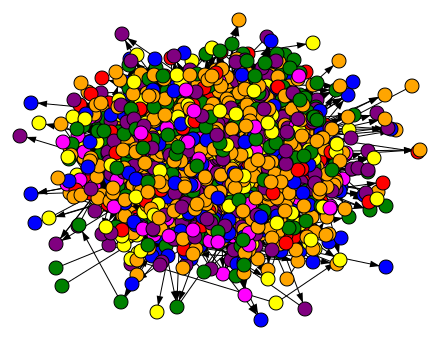

In [9]:
# Visualisation of the graph
image = svg_graph(adj, labels=lab)
SVG(image)

## Networkx

The second library is networkx. Documentation available [here](https://networkx.org/documentation/latest/).

In [10]:
# Installation of the library 
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import networkx as nx
import pandas as pd
import os

In [13]:
# import the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Import the data 
# Compared to scikit-network, networkx does not allow to directly import some well-known graph

data_loc = 'drive/MyDrive/cora/'  # 'cora.cites', 'cora.content'

edgelist = pd.read_csv(os.path.join(data_loc, "cora.cites"), sep='\t', header=None, names=["source", "target"])
edgelist["label"] = "cites"
    
# Let's take a quick look at the data 
edgelist.sample(frac=1).head(5)

,source,target,label
4118,126927,126920,cites
1379,6385,6378,cites
4115,126926,103543,cites
4887,430711,671052,cites
942,3243,368431,cites


In [15]:
# Convert the data to a directed graph
cora = nx.DiGraph()
cora.add_edges_from([(row.source, row.target) for _, row in edgelist.iterrows()])
nx.set_node_attributes(cora,  "paper", "label") # ? 

In [16]:
# We can also retrieve the node labels subject
cora_meta = os.path.expanduser(os.path.join(data_loc, "cora.content"))
node_attr = pd.read_csv(cora_meta, sep='\t', header=None)
values = {row.tolist()[0]: row.tolist()[-1] for _, row in node_attr.iterrows()}
print(len(values))
nx.set_node_attributes(cora, values, 'subject')

2708


#### Ready to describe the network 

We will follow the same steps as for scikit-network to describe the graph. Le networkx library offers more straighforward functions to obtain these caracteristics. 

In [17]:
print("Number of nodes: ", cora.number_of_nodes())
print("Number of edges: ", cora.number_of_edges())

Number of nodes:  2708
Number of edges:  5429


In [18]:
# We can also compute the degree of each node 
outdeg_cora = cora.out_degree()
indeg_cora = cora.in_degree()
deg_cora = cora.degree()

In [19]:
# 2nd method with out_degree directly:
average_out_degree = sum(d for n, d in cora.out_degree()) / len(cora.out_degree())
average_out_degree

2.00480059084195

**To do**: check what is the type of deg_cora, then write a function to get the average degree of a graph 

In [20]:
print('outdeg_cora:', '\n', outdeg_cora)
print('indeg_cora:', '\n', indeg_cora)
print('deg_cora:', '\n', deg_cora)

outdeg_cora: 
 [(35, 166), (1033, 2), (103482, 5), (103515, 9), (1050679, 0), (1103960, 0), (1103985, 0), (1109199, 0), (1112911, 0), (1113438, 0), (1113831, 0), (1114331, 0), (1117476, 0), (1119505, 0), (1119708, 0), (1120431, 0), (1123756, 0), (1125386, 0), (1127430, 0), (1127913, 0), (1128204, 0), (1128227, 0), (1128314, 0), (1128453, 0), (1128945, 0), (1128959, 0), (1128985, 0), (1129018, 0), (1129027, 0), (1129573, 0), (1129683, 0), (1129778, 0), (1130847, 0), (1130856, 0), (1131116, 0), (1131360, 0), (1131557, 0), (1131752, 0), (1133196, 0), (1133338, 0), (1136814, 0), (1137466, 0), (1152421, 0), (1152508, 0), (1153065, 0), (1153280, 0), (1153577, 0), (1153853, 0), (1153943, 0), (1154176, 0), (1154459, 0), (116552, 2), (12576, 19), (128540, 1), (132806, 3), (135130, 3), (141342, 7), (141347, 1), (148170, 2), (15670, 1), (1688, 15), (175291, 1), (178727, 1), (18582, 0), (190697, 0), (190706, 2), (1956, 8), (197054, 1), (198443, 1), (198653, 5), (206371, 1), (210871, 13), (229635, 

In [21]:
type(deg_cora)

networkx.classes.reportviews.DiDegreeView

In [22]:
def average_degree(G):
  return sum(d for n, d in G.degree()) / len(G.degree())

In [23]:
# average_degree here is the sum of in_degree and out_degree:
average_degree(cora)

4.0096011816839

In [24]:
# Centrality measures 

## eigenvectors 
c_eig = nx.eigenvector_centrality(cora)

## closeness 
c_clo = nx.closeness_centrality(cora)

## betweeness 
c_bet = nx.betweenness_centrality(cora)

**To do** For each centrality measure and degree get the top-5 most important nodes. What do you observe?

In [25]:
from collections import Counter

In [26]:
print('top-5 most important nodes according to eigenvectors:', '\n', [n for n, d in Counter(c_eig).most_common(5)])
print('top-5 most important nodes according to closeness:', '\n', [n for n, d in Counter(c_clo).most_common(5)])
print('top-5 most important nodes according to betweeness:', '\n', [n for n, d in Counter(c_bet).most_common(5)])

top-5 most important nodes according to eigenvectors: 
 [126927, 103543, 645897, 644093, 646286]
top-5 most important nodes according to closeness: 
 [1107067, 1153811, 66982, 39210, 1050679]
top-5 most important nodes according to betweeness: 
 [1272, 13686, 6184, 85688, 887]


In [27]:
print('top-5 most important nodes according to in degrees:', '\n', [n for n, d in Counter(indeg_cora).most_common(5)])
print('top-5 most important nodes according to out degrees:', '\n', [n for n, d in Counter(outdeg_cora).most_common(5)])
print('top-5 most important nodes according to degrees:', '\n', [n for n, d in Counter(deg_cora).most_common(5)])


top-5 most important nodes according to in degrees: 
 [(35, 3), (1033, 3), (103482, 1), (103515, 2), (1050679, 4)]
top-5 most important nodes according to out degrees: 
 [(35, 166), (1033, 2), (103482, 5), (103515, 9), (1050679, 0)]
top-5 most important nodes according to degrees: 
 [(35, 169), (1033, 5), (103482, 6), (103515, 11), (1050679, 4)]


The top-5 most important nodes from the three centrality meansures are not the same.

## Node Embedding : DeepWalk

DeepWalk is a classic baseline for node embedding, based on random walks. Basically, a random walk is a way of converting a graph into a sequence of nodes. DeepWalk consists of two main steps: 
1. For each node in the graph, generate a random path of nodes connected 
2. From the corpus of random paths generated in step 1, train a skip-gram (Word2Vec) model 

In this part, we start by implementing the random walk ourselves (for understanding purpose), then use the Word2Vec implementation provided in `gensim`. Then, you will have to find a scalable implementation of the random-walk online and apply it to the full cora network (=what you'll have to do in companies !). 

In [28]:
import random

# Convert Cora to an undirected network 
cora_u = cora.to_undirected()

### Random walk 

Our objective is to write a function, that given a graph, a specific node and the length of the walk, generate a random walk on the graph. The ouput of the function is a list of all the nodes composing the walk. To obtain the list of direct neighbors of a given node, you can use the function `all_neighbors` from the `networkx` package.

In [29]:
# multiple print added in order to understand the functionning of the walk
import random 

walkLength = 10
startNode = list(cora_u.nodes)[0]
print('startNode:', startNode)

# Initialize the walk 
walk = [str(startNode)]
current_node = startNode
for _ in range(walkLength-1):
    # List of neighbors 
    neighbors = list(nx.all_neighbors(cora_u, current_node))
    print('neighbors:', neighbors)
    # Select a random node as the next step in the walk 
    next_node = random.choice(neighbors)
    print('next_node:', next_node)
    # Add the node to the walk 
    walk.append(str(next_node))
    print('walk:', walk)
    # Update de position of the random walk 
    current_node = next_node
    print('current_node:', current_node)

# Display the obtained walk
print(walk) 

startNode: 35
neighbors: [1033, 103482, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, 135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, 190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, 248425, 249421, 254923, 259701, 259702, 263279, 263498, 265203, 273152, 27510, 28290, 286500, 287787, 28851, 289779, 289780, 289781, 307015, 335733, 33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, 46079, 46431, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 56119, 561238, 568857, 573964, 573978, 574009, 574264, 574462, 

**To do** What do you observe if you run the above cell multiple times ? Why ?

If we run the algorithm multiple times, we would observe that the path taken by the algorithm would be different each time, as it is determined by random choice. However, if the graph is sufficiently connected, after a sufficiently large number of steps, the algorithm is likely to have visited all of the nodes in the graph.

#### To do 

1. Define a function random_walk containing the steps above 
2. Explain the code given below. Then based on this latter, define a function RandomWalker that perform a given number of random walks per node and output a corpus of randomwalks (test with 2 random walks per node).

In [30]:
def random_walk(g, node, wlen=10):
    # Initialize the walk 
    walk = [str(node)]
    current_node = node
    for _ in range(wlen-1):
        # List of neighbors 
        neighbors = list(nx.all_neighbors(g, current_node))
        # Select a random node as the next step in the walk 
        next_node = random.choice(neighbors)
        # Add the node to the walk 
        walk.append(str(next_node))
        # Update de position of the random walk 
        current_node = next_node
    return walk

def RandomWalker(g, num_walks):
    walks = []
    for node in g.nodes():
        for _ in range(num_walks):
            walks.append(random_walk(g, node))
    return walks

walks = RandomWalker(cora_u, 5) # random walk with 2 doesn't allow us to go through all nodes 
pd.DataFrame(walks) 

,0,1,2,3,4,5,6,7,8,9
0,35,135130,35,190706,41714,35,35061,503871,45605,682815
1,35,1136814,33907,1103960,33907,97645,35,98698,35,1153853
2,35,1131752,577227,1131752,577227,1131752,35,1128314,579108,1128314
3,35,103515,1127913,103515,8865,608292,8874,646809,1154076,646809
4,35,141347,14062,98693,14062,1152421,35,1131752,577227,1131752
...,...,...,...,...,...,...,...,...,...,...
13535,853118,1140289,3229,1125895,28385,1125895,28385,1125895,28385,1106112
13536,853118,1140289,853118,1140289,3229,1125082,3229,1108834,910,28278
13537,853118,1140289,3229,82098,35,1152421,14062,646836,14062,98693
13538,853118,853155,853115,19621,948147,733534,1135122,72056,2702,72056


* The above function 'RandomWalker' realizes random walks over the whole graph 'g'. For each node of the graph, 'nbr_w' random walks of length 'wlen' are taken. All the history walk paths are saved in 'walks', which is returned by the function.

### Word2Vec 



In [31]:
# Install the library 
!pip install gensim --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import gensim
print(gensim.__version__)

4.3.0


In [33]:
from gensim.models import Word2Vec

In [34]:
# Initialise the model 
embedder = Word2Vec(
    window = 3,
    seed=42,
    sg=1,
    vector_size=32, 
    hs=0, 
    negative=10, 
    alpha=0.02, 
    min_alpha=0.0001,
)

**To do** : take a look at all the hyper-parameters and check for their meaning in the documentation. 
Write in comments their role in the cell above. 

**window**:  Maximum distance between the current and predicted word within a sentence. The larger the window, the more context the algorithm considers when predicting the next word, but it may also lead to overfitting.

**seed**: Seed for the random number generator. Initial vectors for each word are seeded with a hash of the concatenation of word + str(seed). Note that for a fully deterministically-reproducible run, you must also limit the model to a single worker thread (workers=1), to eliminate ordering jitter from OS thread scheduling. (In Python 3, reproducibility between interpreter launches also requires use of the PYTHONHASHSEED environment variable to control hash randomization).

**sg**: The training algorithm to use. If sg=0, then the CBOW (Continuous Bag-of-Words) model is used, if sg=1 then the Skip-gram model is used

**vector_size**: Dimensionality of the word vectors.

**hs**:  If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.

**negative**: If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.

**alpha**: The initial learning rate for the training algorithm.

**min_alpha**: Learning rate will linearly drop to min_alpha as training progresses.

**For the question below, there are two points to look at:**

embedder.wv: This object essentially contains the mapping between words and embeddings. After training, it can be used directly to query those embeddings in various ways

embedder.build_vocab: The method first initializes an empty vocabulary, and then iterates over the sentences, adding each word to the vocabulary, along with some additional information like the number of occurrences of the word and its index in the vocabulary.

In [35]:
# Next, we build the vocabulary out of the nodes 

embedder.build_vocab(walks, progress_per=2) # progress_per:  an integer specifying the number of words to process before updating the progress.
embedder.train(
    walks,
    total_examples=embedder.corpus_count, 
    epochs=4, 
)
# .wv gives vector of a word:
vectors = pd.DataFrame({node: embedder.wv[node] for node in embedder.wv.key_to_index.keys()}).T 

In [36]:
# number of nodes:
len(embedder.wv.key_to_index.keys())

2708

In [37]:
# example of embeddings with a dimensionality of 32 defined in vector_size
embedder.wv[0] 

array([ 0.09638648,  0.35260627, -0.57003784,  0.35244444, -0.92285013,
        0.92363787,  0.06028581,  0.40794465, -0.42693236,  0.03317523,
        0.5560486 ,  0.4447209 ,  0.1699007 , -0.20115753,  0.14623761,
        1.3706583 ,  0.05984337, -0.48870143,  0.55223835,  0.275429  ,
       -0.5672418 , -0.68039834, -0.8517682 ,  0.5632537 , -0.3171017 ,
        0.7080547 , -1.1623445 ,  1.7604823 ,  0.61793745, -0.6780033 ,
       -0.9663802 , -0.8503683 ], dtype=float32)

**To do** : display the shape of embedding matrix and the 3 first rows. 

In [38]:
print('shape of embedding matrix:', '\n', vectors.shape)
print('the 3 first rows of embedding matrix:', '\n')
vectors.head(3)

shape of embedding matrix: 
 (2708, 32)
the 3 first rows of embedding matrix: 



,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
35,0.096386,0.352606,-0.570038,0.352444,-0.922850,0.923638,0.060286,0.407945,-0.426932,0.033175,...,-0.851768,0.563254,-0.317102,0.708055,-1.162344,1.760482,0.617937,-0.678003,-0.966380,-0.850368
1365,-0.349892,-0.947558,1.761635,-0.470470,0.365942,1.947171,0.304575,0.779881,-1.669890,-0.056535,...,-0.649756,-1.391743,0.455368,-0.963600,0.089002,1.395086,1.655505,-0.100326,-0.132269,0.770077
3229,0.337023,-0.831378,2.097937,-0.324707,-0.568753,1.211779,-0.275113,-0.622255,-0.859555,-0.003989,...,-1.019240,-0.643536,0.887887,1.366413,-0.565762,0.951949,0.762564,-0.782688,-0.275363,-0.669121


In [39]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [40]:
# Join embedding and label information
t = pd.DataFrame.from_dict(values, orient='index', columns=['label'])
print(t)
t.index = t.index.astype(str)
print(t.index)
h = vectors.join(t, how='left')
print(h.shape)
h.head()

                          label
31336           Neural_Networks
1061127           Rule_Learning
1106406  Reinforcement_Learning
13195    Reinforcement_Learning
37879     Probabilistic_Methods
...                         ...
1128975      Genetic_Algorithms
1128977      Genetic_Algorithms
1128978      Genetic_Algorithms
117328               Case_Based
24043           Neural_Networks

[2708 rows x 1 columns]
Index(['31336', '1061127', '1106406', '13195', '37879', '1126012', '1107140',
       '1102850', '31349', '1106418',
       ...
       '626531', '1131180', '1130454', '1131184', '1128974', '1128975',
       '1128977', '1128978', '117328', '24043'],
      dtype='object', length=2708)
(2708, 33)


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,label
35,0.096386,0.352606,-0.570038,0.352444,-0.922850,0.923638,0.060286,0.407945,-0.426932,0.033175,...,0.563254,-0.317102,0.708055,-1.162344,1.760482,0.617937,-0.678003,-0.966380,-0.850368,Genetic_Algorithms
1365,-0.349892,-0.947558,1.761635,-0.470470,0.365942,1.947171,0.304575,0.779881,-1.669890,-0.056535,...,-1.391743,0.455368,-0.963600,0.089002,1.395086,1.655505,-0.100326,-0.132269,0.770077,Neural_Networks
3229,0.337023,-0.831378,2.097937,-0.324707,-0.568753,1.211779,-0.275113,-0.622255,-0.859555,-0.003989,...,-0.643536,0.887887,1.366413,-0.565762,0.951949,0.762564,-0.782688,-0.275363,-0.669121,Neural_Networks
6213,-0.022249,-0.554328,0.685694,0.257836,-0.432259,0.989883,0.884664,0.025317,-0.349105,-0.070594,...,-0.809055,-0.016951,0.353039,-0.113946,0.809543,1.038633,-0.228775,-0.448648,0.506327,Reinforcement_Learning
910,-0.530802,0.336672,2.081788,-0.438434,-0.484433,1.397938,-0.019480,0.320828,-0.677197,-1.403009,...,-0.444079,0.770761,0.499615,-0.451191,1.458422,-0.497061,0.028283,-0.148601,0.145643,Neural_Networks


In [41]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_vectors = tsne_model.fit_transform(h.iloc[:,:-1])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


**To do** : check the dimension of tsne_vectors and take a look at the documentation of TSNE to explain the hyper-parameters.

In [42]:
tsne_vectors.shape

(2708, 2)

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that can be used to visualize high-dimensional data by mapping it to a low-dimensional space (e.g. two or three dimensions). The scikit-learn library provides an implementation of the t-SNE algorithm in the TSNE class in the sklearn.manifold module.
The basic idea behind t-SNE is to measure the similarity between pairs of data points in the high-dimensional space and in the low-dimensional space (i.e. the mapping) in a probabilistic way. t-SNE tries to minimize the divergence between these two probability distributions, thus preserving the structure of the data.
To use the TSNE class, you need to instantiate the class and then call the fit_transform() method on your data. The method takes as input a matrix of data samples, where each row represents a sample, and returns a matrix of the same size, where each row represents the mapped sample in the low-dimensional space.

* **n_components** : Number of components in the low-dimensional space.

* **perplexity** : The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.

* **early_exaggeration** : controls how much to separate the clusters in the early stages of optimization.

* **learning_rate** : controls the step size of the optimization algorithm.

* **n_iter** : maximum number of iterations for the optimization.

* **random_state** : random state for reproducibility.



The cm.rainbow colormap in the matplotlib library is a continuous colormap that ranges from dark purple to dark yellow, and goes through shades of blue, green, yellow and red.

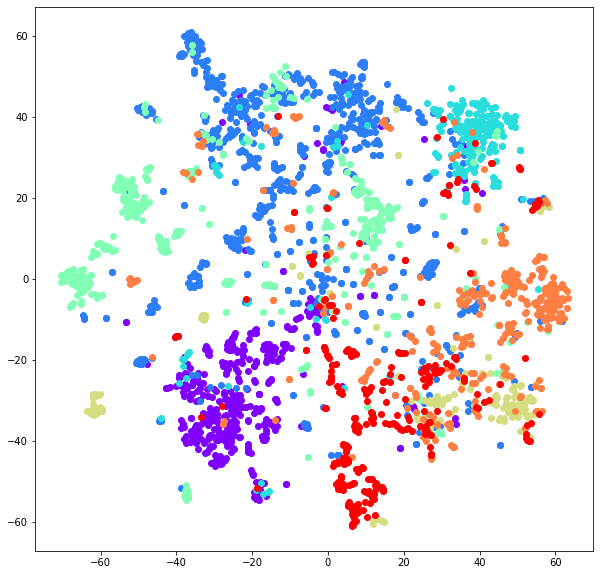

In [43]:
# Plot 
y = h['label']
# Retrieve labels for visualisation 
labels = h['label'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.figure(figsize=(10, 10)) 
for i, label in enumerate(labels):
  plt.scatter(tsne_vectors[y==label, 0], tsne_vectors[y==label, 1], color=colors[i])
plt.show()

### To do 

1. Code improvement: define a class DeepWalk, which given a graph, the walk length, the number of walks per nodes and the desired dimension outputs the dataframe (or any object of your choice) of the embeddings. An option must allow to choose to visualize the obtained embedding with t-sne.

In [44]:
class DeepWalk:
    def __init__(self, graph, walk_length, num_walks, dim, visualization):
        self.graph = graph
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.dim = dim
        self.walks = []
        self.visualization = visualization
    
    def random_walk(self, node):
        # Initialize the walk 
        walk = [str(node)]
        current_node = node
        for _ in range(self.walk_length-1):
            # List of neighbors 
            neighbors = list(nx.all_neighbors(self.graph, current_node))
            # Select a random node as the next step in the walk 
            next_node = random.choice(neighbors)
            # Add the node to the walk 
            walk.append(str(next_node))
            # Update de position of the random walk 
            current_node = next_node

    def random_walker(self):
      for node in self.graph.nodes():
          for _ in range(self.num_walks):
              self.walks.append(random_walk(self.graph, node))
      return self.walks
    
    def embedding_builder(self):
        embedder = Word2Vec(window=3, seed=42, sg=1, vector_size=self.dim, hs=0, negative=10, alpha=0.02, min_alpha=0.0001)
        embedder.build_vocab(self.walks, progress_per=2) # progress_per:  an integer specifying the number of words to process before updating the progress.
        embedder.train(
            self.walks,
            total_examples=embedder.corpus_count, 
            epochs=4, 
        )
        vectors = pd.DataFrame({node: embedder.wv[node] for node in embedder.wv.key_to_index.keys()}).T
        t = pd.DataFrame.from_dict(values, orient='index', columns=['label'])
        t.index = t.index.astype(str)
        h = vectors.join(t, how='left')
        tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
        tsne_vectors = tsne_model.fit_transform(h.iloc[:,:-1])
        return h, tsne_vectors
   
    def plotter(self, h, tsne_vectors):
        if self.visualization == True:
        # Plot 
            y = h['label']
            # Retrieve labels for visualisation 
            labels = h['label'].unique()
            colors = cm.rainbow(np.linspace(0, 1, len(labels)))
            plt.figure(figsize=(10, 10)) 
            for i, label in enumerate(labels):
              plt.scatter(tsne_vectors[y==label, 0], tsne_vectors[y==label, 1], color=colors[i])
            plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


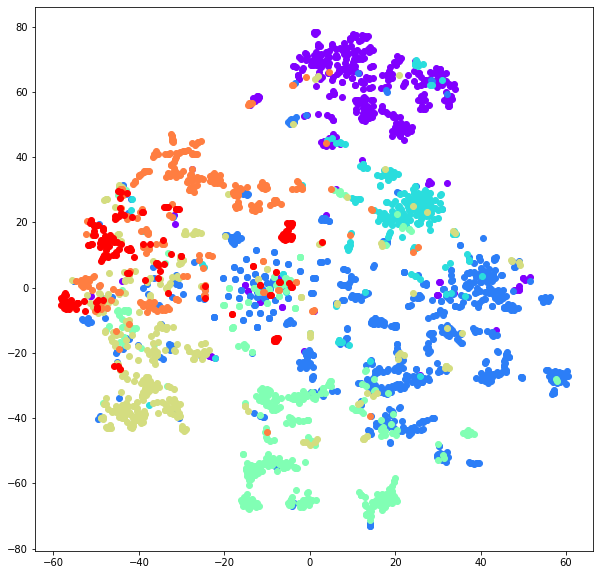

In [45]:
deepwalk = DeepWalk(graph=cora_u, walk_length=10, num_walks=10, dim=32, visualization=True)
walks = deepwalk.random_walker()
h, tsne_vectors = deepwalk.embedding_builder()
deepwalk.plotter(h, tsne_vectors)



2. Use the obtained vectors as input data to learn a classifier (of your choice) to predict the **subject** of a paper. Note that, in our case we are only using the position of the paper in the graph and not the node features. 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [47]:
X = h.iloc[:, :-1].to_numpy()
y = h.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8277404921700223





3. Run Node2Vec on the same data and compare the obtained visualization and a classifier. You can choose the implementation/tool/librairy of your choice, but you have to specify all your sources and to carefully comment your code. 

In [48]:
! pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import networkx as nx
from node2vec import Node2Vec 

In [54]:
class DeepWalk_with_Node2Vec:

    def __init__(self, graph, walk_length, num_walks, dim, visualization):
        self.graph = graph
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.dim = dim
        self.visualization = visualization

    def embedding_builder(self):
            node2vec = Node2Vec(self.graph, dimensions = self.dim, walk_length=self.walk_length, num_walks=self.num_walks)
            model = node2vec.fit(window=15, min_count=1, batch_words=4) 
            vectors = pd.DataFrame({node: model.wv[node] for node in model.wv.key_to_index.keys()}).T
            t = pd.DataFrame.from_dict(values, orient='index', columns=['label'])
            t.index = t.index.astype(str)
            h = vectors.join(t, how='left')
            tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
            tsne_vectors = tsne_model.fit_transform(h.iloc[:,:-1])
            return h, tsne_vectors
            
    def plotter(self, h, tsne_vectors):
        if self.visualization == True:
        # Plot 
            y = h['label']
            # Retrieve labels for visualisation 
            labels = h['label'].unique()
            colors = cm.rainbow(np.linspace(0, 1, len(labels)))
            plt.figure(figsize=(10, 10)) 
            for i, label in enumerate(labels):
              plt.scatter(tsne_vectors[y==label, 0], tsne_vectors[y==label, 1], color=colors[i])
            plt.show()

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.10it/s]
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


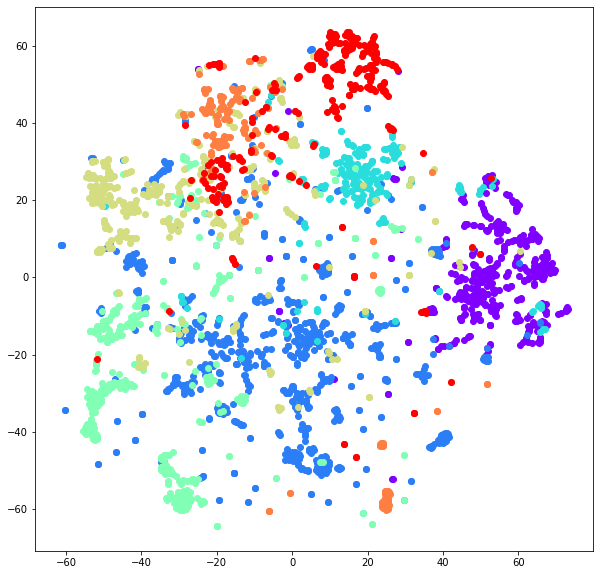

In [55]:
node2vec = DeepWalk_with_Node2Vec(graph=cora_u, walk_length=10, num_walks=10, dim=32, visualization=True)
h, tsne_vectors = node2vec.embedding_builder()
node2vec.plotter(h, tsne_vectors)


In [56]:
X = h.iloc[:, :-1].to_numpy()
y = h.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8344519015659956

The difference between Node2Vec and DeepWalk is that Node2Vec has a biased walk, which is parameterized by p and q. The parameter p prioritizes a breadth-first-search (BFS) procedure, while the parameter q prioritizes a depth-first-search (DFS) procedure. The decision of where to walk next is therefore influenced by probabilities 1/p or 1/q.

#Another implementation of Node2Vec

In [ ]:
! pip install stellargraph

In [57]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from stellargraph import datasets
from IPython.display import display, HTML

%matplotlib inline

In [58]:
dataset = datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load(largest_connected_component_only=True)

In [59]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2485, Edges: 5209

 Node types:
  paper: [2485]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5209]
        Weights: all 1 (default)
        Features: none


In [60]:
rw = BiasedRandomWalk(G)

walks = rw.run(
    nodes=list(G.nodes()),  # root nodes
    length=10,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 24850


In [61]:
str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(str_walks, window=3, seed=42, sg=1, vector_size=32, hs=0, negative=10, alpha=0.02, min_alpha=0.0001)

In [62]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.key_to_index.keys()  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = node_subjects[[int(node_id) for node_id in node_ids]]

In [63]:
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


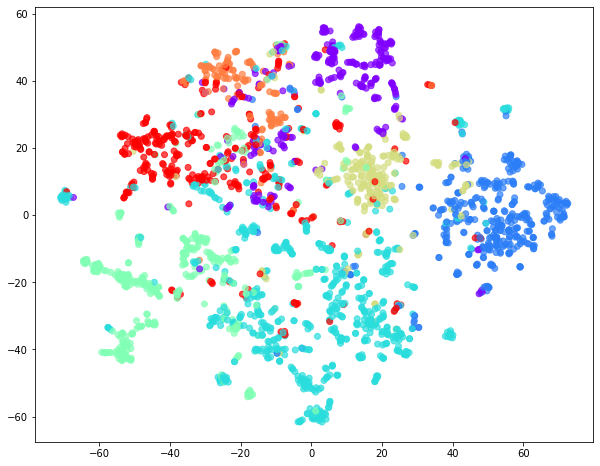

In [64]:
# draw the points
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="rainbow",
    alpha=alpha,
)

In [65]:
# X will hold the 128-dimensional input features
X = node_embeddings
# y holds the corresponding target values
y = np.array(node_targets)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8501827040194885

End